In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 체크

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
# 임신, 포도당, 혈압, 피부두께, 인슐린, BMI, 집안내력, 나이, 여부 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 데이터 모양 확인
df.shape

(768, 9)

In [5]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 0: 음성, 1: 양성
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

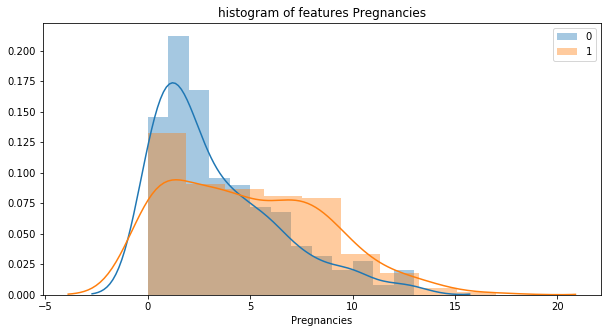

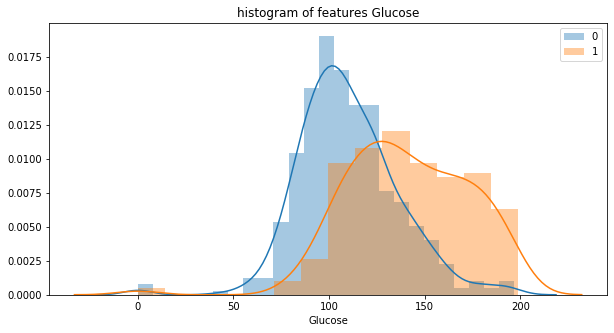

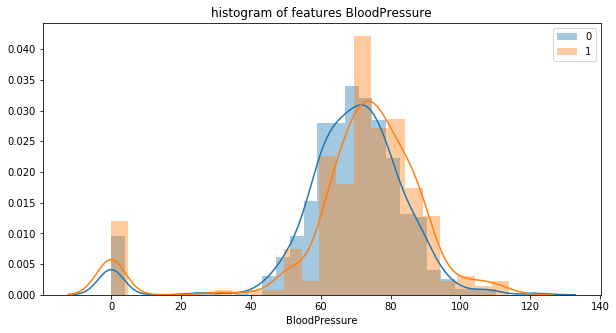

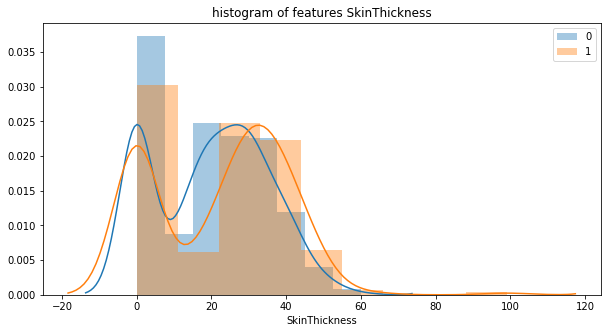

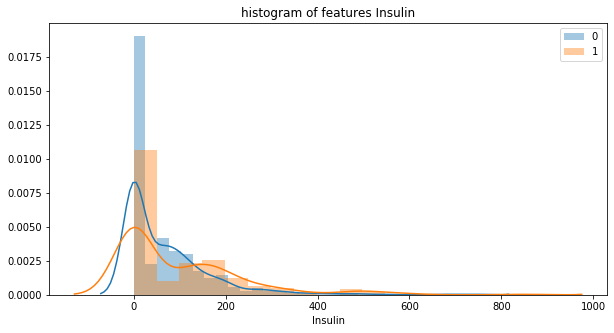

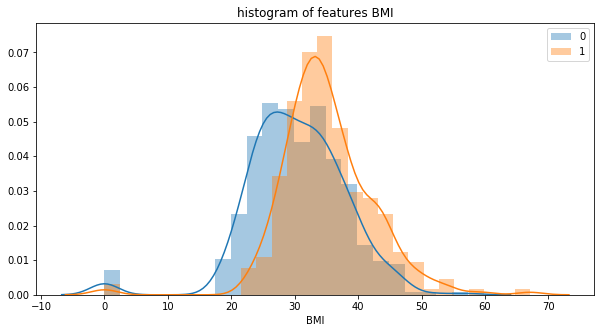

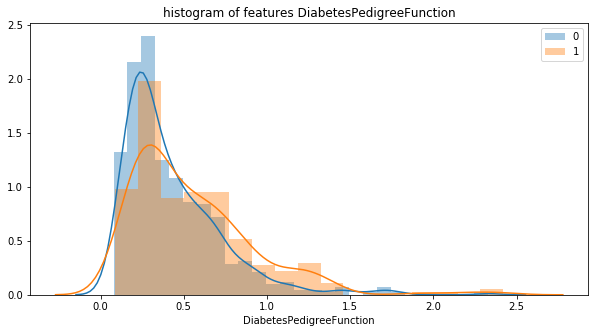

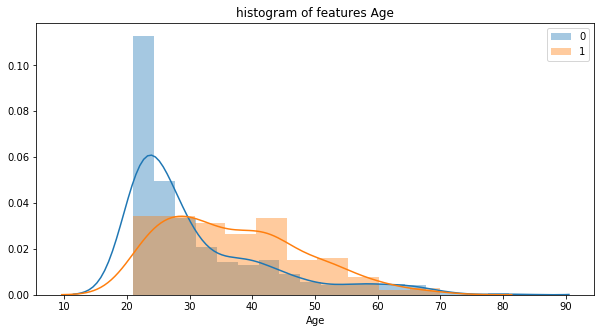

In [7]:
for i, col in enumerate(df):
    try:
        plt.figure(figsize=(10, 5))
        sns.distplot(df[col][df['Outcome']==0])
        sns.distplot(df[col][df['Outcome']==1])
        plt.legend(['0', '1'], loc='best')
        plt.title('histogram of features '+str(col))
        plt.show()
        
        if i >= 7:
            break
    
    except:
        pass

### 당뇨병을 앓고 있는 사람들은 포도당과 BMI 수치가 높은 것을 알 수 있음

In [8]:
df.iloc[:, :-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


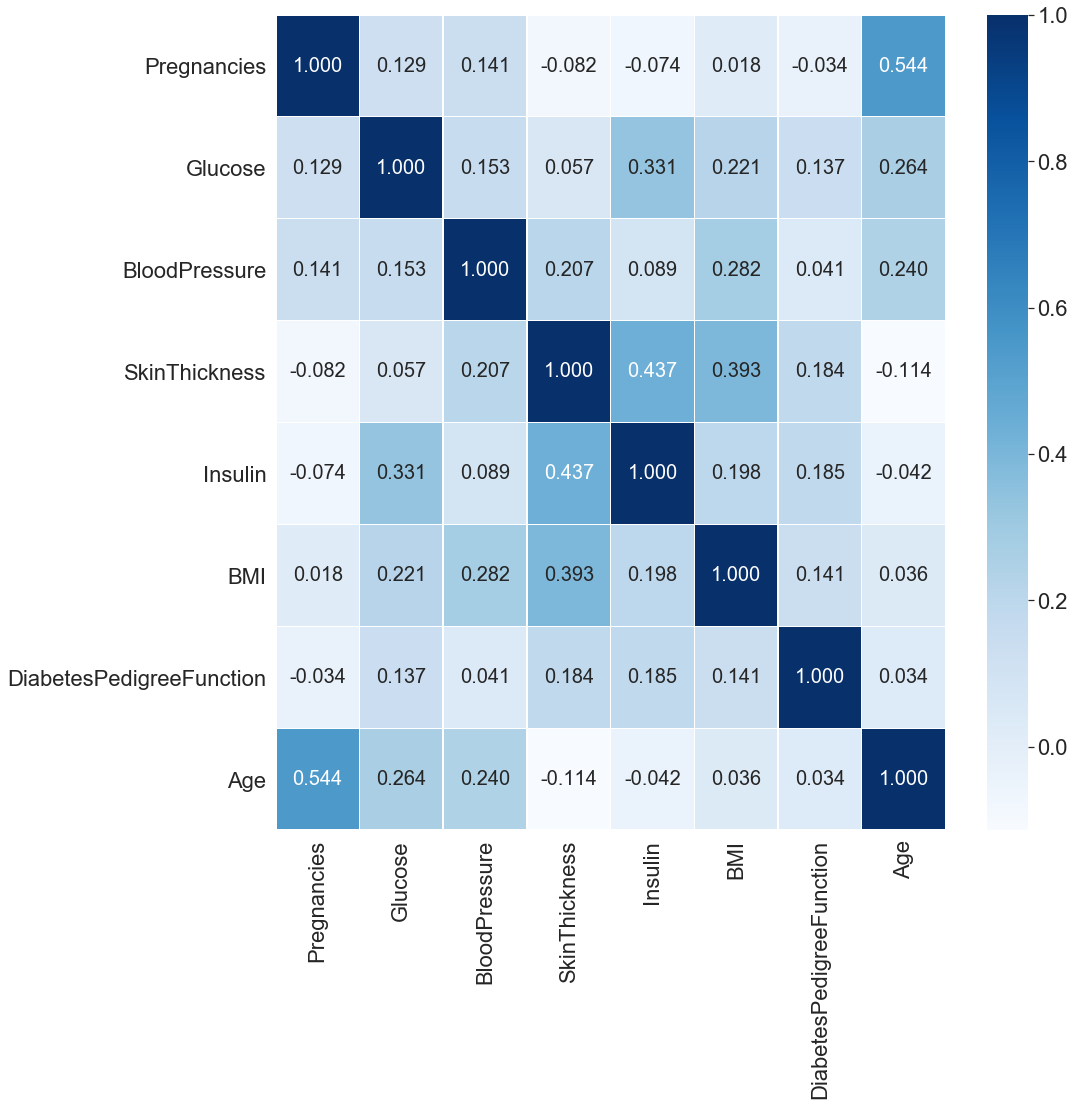

In [9]:
# 상관관계 시각화
plt.figure(figsize=(15, 15))
sns.set(font_scale=2)
sns.heatmap(data=df.iloc[:, :-1].corr(), annot=True, fmt='.3f', cmap='Blues', 
           linewidths=.5, annot_kws={"size": 20})


## 머신러닝 모델

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.15, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(652, 8) (116, 8) (652,) (116,)


In [13]:
# SVM
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
svc_score = clf_svc.score(X_test, y_test)
print("SVC score: ", svc_score)

SVC score:  0.75


In [14]:
param_grid = [{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]}]

In [15]:
# LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
lr_score = clf_lr.score(X_test, y_test)
print("Logistic Regression score: ", lr_score)

Logistic Regression score:  0.7672413793103449


/Users/choijihoon/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
# DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
dt_score = clf_dt.score(X_test, y_test)
print("Decision Tree score: ", dt_score)

Decision Tree score:  0.7672413793103449


In [46]:
df_values = df.iloc[:, :-1].values

### StandardScaler

In [58]:
standardscaler = StandardScaler()
standardscaler.fit(df_values)
df_standard = standardscaler.transform(df_values)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_standard, df.iloc[:, -1].values, test_size=0.15, random_state=42)

In [61]:
# GradientBoostingClassifier
clf_gbrt = GradientBoostingClassifier() 
clf_gbrt.fit(X_train, y_train)
gbrt_score = clf_gbrt.score(X_test, y_test)
print("GradientBoostingClassifier score: ", gbrt_score)

GradientBoostingClassifier score:  0.7155172413793104


In [60]:
# DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
dt_score = clf_dt.score(X_test, y_test)
print("Decision Tree score: ", dt_score)

Decision Tree score:  0.7327586206896551


### RobustScaler

In [47]:
robustscaler = RobustScaler()
robustscaler.fit(df_values)
df_robust = robustscaler.transform(df_values)

In [48]:
df_robust

array([[ 0.6       ,  0.75151515,  0.        , ...,  0.17204301,
         0.66535948,  1.23529412],
       [-0.4       , -0.77575758, -0.33333333, ..., -0.58064516,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.6       , -0.44444444, ..., -0.93548387,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.0969697 ,  0.        , ..., -0.62365591,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.21818182, -0.66666667, ..., -0.20430108,
        -0.06143791,  1.05882353],
       [-0.4       , -0.58181818, -0.11111111, ..., -0.17204301,
        -0.1503268 , -0.35294118]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_robust, df.iloc[:, -1].values, test_size=0.15, random_state=42)

In [53]:
# GradientBoostingClassifier
clf_gbrt = GradientBoostingClassifier() 
clf_gbrt.fit(X_train, y_train)
gbrt_score = clf_gbrt.score(X_test, y_test)
print("GradientBoostingClassifier score: ", gbrt_score)

GradientBoostingClassifier score:  0.7155172413793104


In [54]:
# DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
dt_score = clf_dt.score(X_test, y_test)
print("Decision Tree score: ", dt_score)

Decision Tree score:  0.7844827586206896


## 딥러닝 모델

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import AUC

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.15, random_state=42)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [20]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(456, 8) (196, 8) (456,) (196,)


In [29]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(8,)))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [40]:
model_com = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
15/15 [==============================] - 0s 11ms/step - loss: 0.7081 - accuracy: 0.6294 - val_loss: 0.6578 - val_accuracy: 0.6327
Epoch 2/15
15/15 [==============================] - 0s 3ms/step - loss: 0.7325 - accuracy: 0.6360 - val_loss: 0.6586 - val_accuracy: 0.6582
Epoch 3/15
15/15 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.6228 - val_loss: 0.6925 - val_accuracy: 0.6020
Epoch 4/15
15/15 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6579 - val_loss: 0.6401 - val_accuracy: 0.6582
Epoch 5/15
15/15 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6513 - val_loss: 0.6884 - val_accuracy: 0.6582
Epoch 6/15
15/15 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.6579 - val_loss: 0.6465 - val_accuracy: 0.6429
Epoch 7/15
15/15 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6316 - val_loss: 0.6729 - val_accuracy: 0.6582
Epoch 8/15
15/15 [=

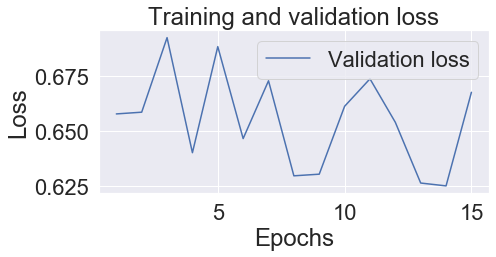

In [41]:
history_dict = model_com.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
plt.figure(figsize=(7,3))
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 딥러닝 모델은 데이터가 부족해서 성능이 잘 나오지 않음